# Objetivo

Entender a relação das variáveis explicativas e resposta, com o uso de importância de variáveis e o SHAP values, para o melhor modelo encontrado anteriormente (RandomForest).

# Pacotes

In [19]:
import pandas as pd
import numpy as np
import mlflow
import shap
import matplotlib.pyplot as plt

In [2]:
%run ../99.Funcoes_auxiliares/Funcoes.py

# Leitura da base de validação

In [3]:
dados_val_pp = pd.read_parquet('../0.Avalia_Dados/Dados/validacao_pp.parquet')
dados_val = pd.read_parquet('../0.Avalia_Dados/Dados/validacao.parquet').reset_index(drop=True)
dados_val_pp.head()

,id,documento,mes_pagamento,IDADE,VAR_4,VAR_5,VAR_7,VAR_8,VAR_9,VAR_11,...,VAR_48,VAR_50,VAR_51,VAR_52,VAR_53,VAR_55,VAR_56,VAR_57,VAR_113,VAR_256
0,0x1b485a,0x1dabfd,202209,0.111387,-0.471274,1.288945,3.088291,1.518025,-0.008872,-1.617801,...,0,0,0,0,0,0,0,0,0,0
1,0x6fc044,0x94cbb,202207,-0.246915,-0.471274,-1.009303,-0.492098,1.518025,-0.117696,0.918406,...,0,0,0,0,0,0,1,0,1,0
2,0x80a6ed,0x7b09ad,202206,1.176346,-0.471274,-0.335498,-0.190003,-0.456397,0.099952,0.918406,...,0,0,0,0,1,0,1,1,0,0
3,0x74c722,0x809089,202205,0.239899,1.179068,0.124151,-0.190003,-0.556881,-0.226520,-0.218089,...,0,0,0,0,0,0,0,0,1,0
4,0x1eddcf,0x1d2dbb,202205,0.875906,-0.471274,0.489782,-0.190003,-0.556881,3.854373,-0.218089,...,0,0,0,0,0,0,0,0,1,0


# Carrega o modelo

In [4]:
logged_model = 'runs:/7f84bc363f274ec6809fc04c9cd31af6/modelo'

# Load model as a PyFuncModel.
RF = mlflow.sklearn.load_model(logged_model)

In [5]:
# Aplicação do modelo e criação do percentual pago estimado

X_val = dados_val_pp.drop(columns=['saldo_vencido', 'pagamento', 'id', 'documento', 'mes_pagamento'])
dados_val_pp['predict'] = RF.predict(pd.DataFrame(X_val))
dados_val_pp['perc_pago_est'] = dados_val_pp['predict']/dados_val_pp['saldo_vencido']

In [13]:
dados_val_pp.head()

,id,documento,mes_pagamento,IDADE,VAR_4,VAR_5,VAR_7,VAR_8,VAR_9,VAR_11,...,VAR_51,VAR_52,VAR_53,VAR_55,VAR_56,VAR_57,VAR_113,VAR_256,predict,perc_pago_est
0,0x1b485a,0x1dabfd,202209,0.111387,-0.471274,1.288945,3.088291,1.518025,-0.008872,-1.617801,...,0,0,0,0,0,0,0,0,681.712675,0.982436
1,0x6fc044,0x94cbb,202207,-0.246915,-0.471274,-1.009303,-0.492098,1.518025,-0.117696,0.918406,...,0,0,0,0,1,0,1,0,735.514911,0.381869
2,0x80a6ed,0x7b09ad,202206,1.176346,-0.471274,-0.335498,-0.190003,-0.456397,0.099952,0.918406,...,0,0,1,0,1,1,0,0,633.777847,0.738996
3,0x74c722,0x809089,202205,0.239899,1.179068,0.124151,-0.190003,-0.556881,-0.226520,-0.218089,...,0,0,0,0,0,0,1,0,590.710332,0.795013
4,0x1eddcf,0x1d2dbb,202205,0.875906,-0.471274,0.489782,-0.190003,-0.556881,3.854373,-0.218089,...,0,0,0,0,0,0,1,0,555.769904,0.195685


# Importância de variáveis

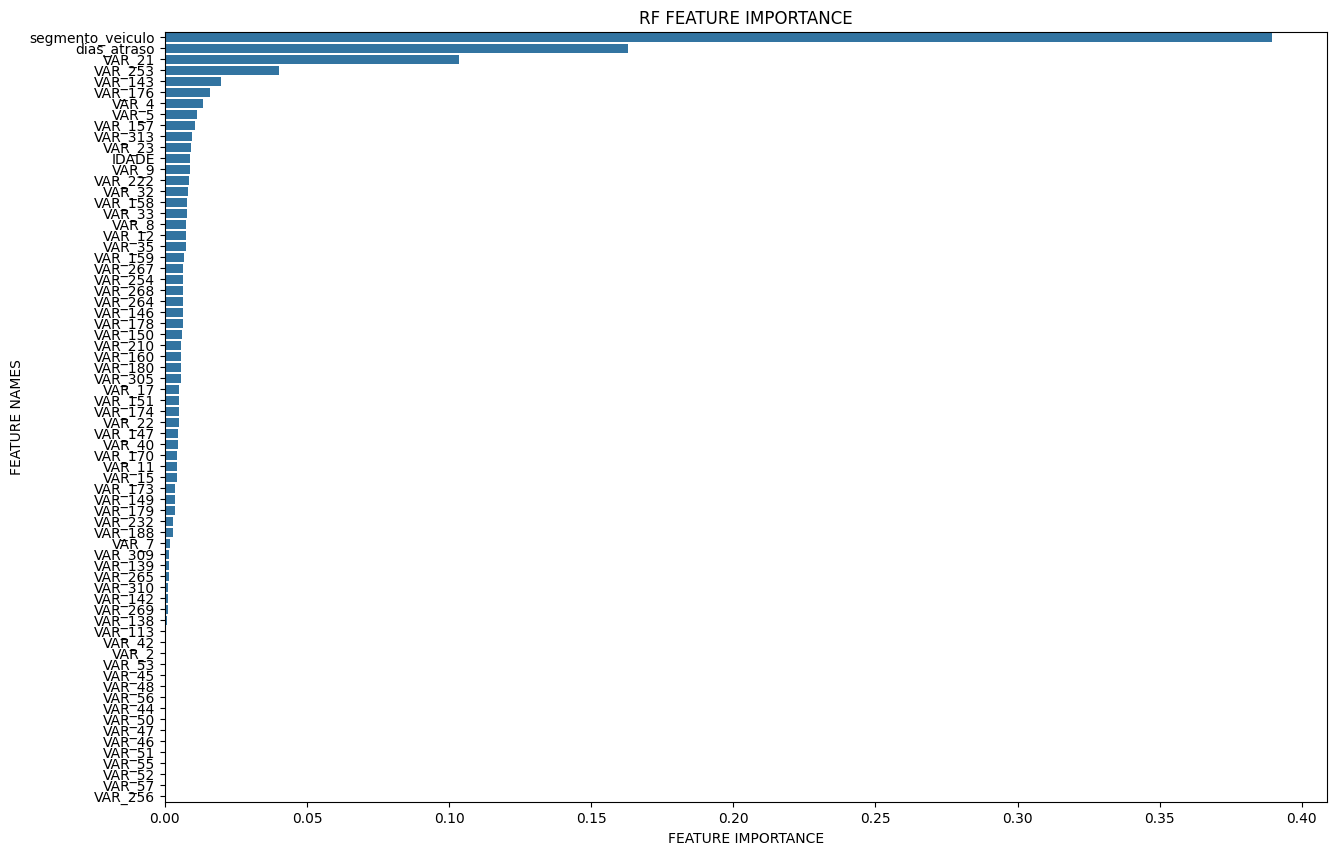

In [ ]:
# Note que algumas variáveis possuem baixa importância. Uma possibilidade seria rodar um modelo com a retirada de algumas delas.

plot_feature_importance(RF.feature_importances_, RF.feature_names_in_, 'RF')

# SHAP values

In [ ]:
# SHAP value calculado para as primeira 5000 observações

explainer = shap.TreeExplainer(RF)
shap_values = explainer(X_val[0:5000])

In [26]:
shap_values

.values =
array([[ 1.89447245e+00, -6.37340985e+00,  6.07313724e+00, ...,
         0.00000000e+00, -7.90599609e-02,  0.00000000e+00],
       [ 2.03084967e+00, -6.49540746e+00, -4.94762188e+00, ...,
         0.00000000e+00,  3.04678974e-02,  0.00000000e+00],
       [ 1.70001471e+00, -5.79106628e+00, -1.99781380e+00, ...,
         0.00000000e+00, -8.12798838e-02,  0.00000000e+00],
       ...,
       [ 2.12135324e+00,  8.89613310e+00,  6.25175647e+00, ...,
         0.00000000e+00, -7.70310700e-02,  0.00000000e+00],
       [ 2.07913888e+00,  1.63796937e+01,  2.52525429e+00, ...,
         0.00000000e+00,  1.36665578e-02,  0.00000000e+00],
       [ 8.09679984e-01, -3.25033058e+00,  5.42459989e+00, ...,
         0.00000000e+00, -1.43828178e-01,  0.00000000e+00]],
      shape=(5000, 70))

.base_values =
array([674.46271342, 674.46271342, 674.46271342, ..., 674.46271342,
       674.46271342, 674.46271342], shape=(5000,))

.data =
array([[ 0.11138696, -0.47127385,  1.28894533, ...,  0.        ,


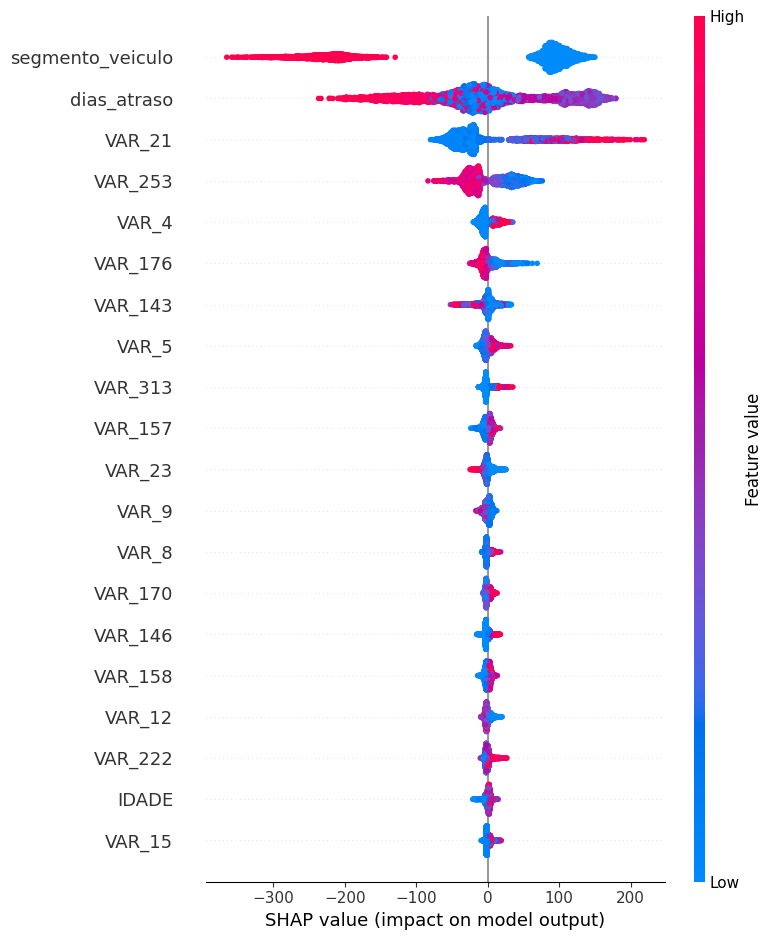

In [ ]:
# Interpretabilidade das top 4 variáveis

# Note que para o segmento_veiculo (em vermelho é o carro e em azul é a moto), a moto tem um valor recuperado maior e o carro menor
    # Pode-se pensar que isso se deve ao fato de que o carro tem um valor maior nas parcelas e potencialmente mais dificuldade de pagamento

# Dias de atraso ficou muito ruim a interpretabilidade, mas pode-se ver que atrasos maiores tem um valor de pagamento menor

# Para a VAR_21, nota-se que quanto menor seu valor, o valor de pagamento é menor.

# Para a VAR_253, nota-se que quanto maior seu valor, o valor de pagamento é menor.

shap.summary_plot(shap_values.values, X_val[0:5000])

In [6]:
dados_val = pd.concat([dados_val, dados_val_pp['predict']], axis=1)
dados_val.head()

,id,documento,mes_pagamento,dias_atraso,segmento_veiculo,saldo_vencido,pagamento,divida_restante,per_pago,GENERO,...,VAR_308,VAR_309,VAR_310,VAR_311,VAR_312,VAR_313,VAR_314,VAR_315,target,predict
0,0x1b485a,0x1dabfd,202209,24,leves,693.90,693.90,0.00,1.0,F,...,MEDIO,0.0,0.0,URBANO,SUL,0.0,F,1.0,1,681.712675
1,0x6fc044,0x94cbb,202207,68,leves,1926.09,0.00,1926.09,0.0,F,...,MEDIO,1.0,1.0,URBANO,NORDESTE,0.0,F,1.0,0,735.514911
2,0x80a6ed,0x7b09ad,202206,21,leves,857.62,857.62,0.00,1.0,M,...,LONGE,0.0,0.0,URBANO,SUL,0.0,E,1.0,1,633.777847
3,0x74c722,0x809089,202205,33,motos,743.02,0.00,743.02,0.0,M,...,PROXIMO,0.0,0.0,URBANO MODERADO,NORDESTE,1.0,A,2.0,0,590.710332
4,0x1eddcf,0x1d2dbb,202205,75,leves,2840.13,0.00,2840.13,0.0,M,...,LONGE,0.0,1.0,URBANO,SUDESTE,0.0,F,1.0,0,555.769904


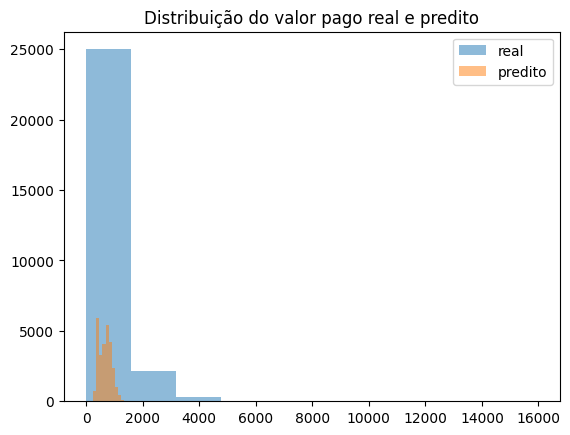

In [7]:
plt.hist(dados_val['pagamento'], alpha=0.5, label='real')
plt.hist(dados_val['predict'], alpha=0.5, label='predito')
plt.legend()
plt.title('Distribuição do valor pago real e predito')
plt.show()

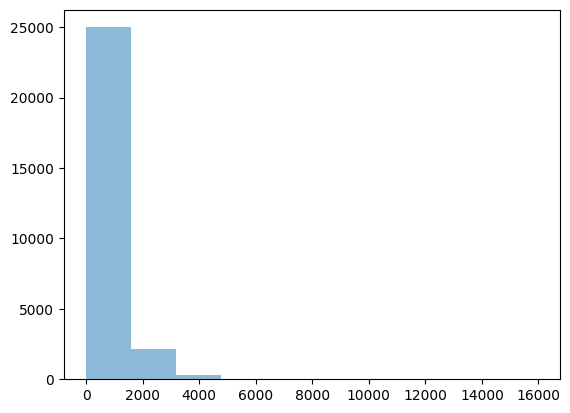

In [9]:
plt.hist(dados_val['pagamento'], alpha=0.5, label='real')
plt.show()

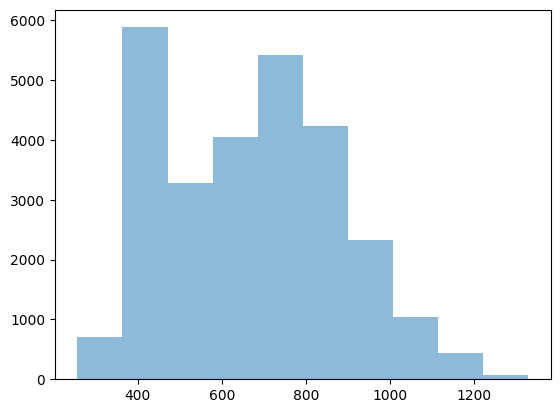

In [10]:
plt.hist(dados_val['predict'], alpha=0.5, label='predito')
plt.show()

In [18]:
cortes = np.sort(pd.qcut(dados_val['predict'], q = 4).unique())
cortes

array([Interval(256.482, 478.872, closed='right'),
       Interval(478.872, 681.627, closed='right'),
       Interval(681.627, 821.266, closed='right'),
       Interval(821.266, 1329.578, closed='right')], dtype=object)

# Conclusão

- Note que as top 4 variáveis mais importantes são aquelas que possuem os maiores valores SHAP também;

- Pode-se usar um conjunto de variáveis mais importantes e rodar novamente um modelo.